In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load Fashion MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [4]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

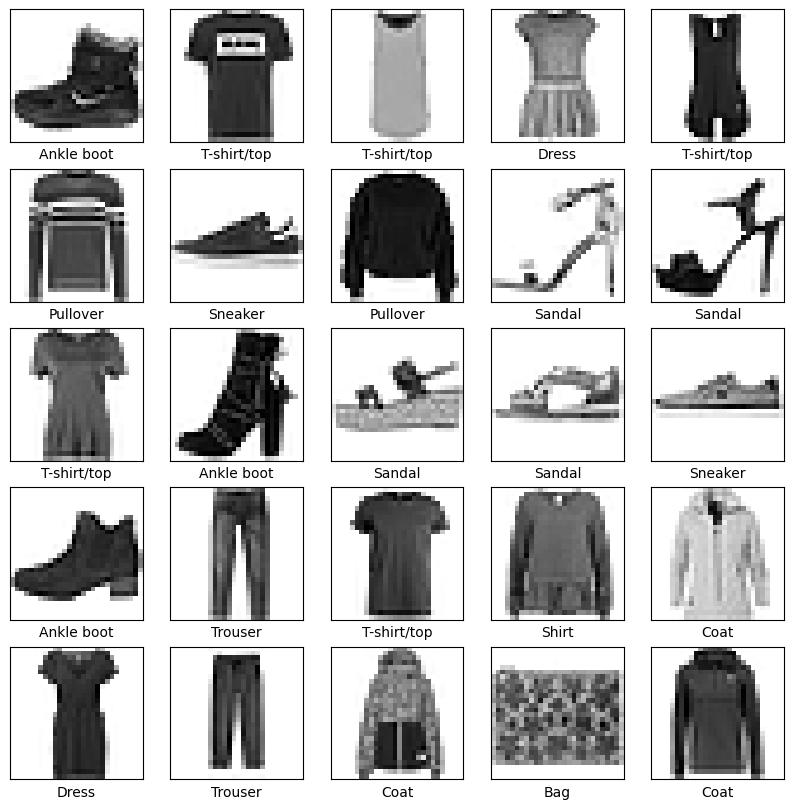

In [5]:
# Visualize the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 14s 33ms/step - loss: 0.5068 - accuracy: 0.8244 - val_loss: 0.3588 - val_accuracy: 0.8732
Epoch 2/10
422/422 [==============================] - 14s 32ms/step - loss: 0.3360 - accuracy: 0.8813 - val_loss: 0.3221 - val_accuracy: 0.8843
Epoch 3/10
422/422 [==============================] - 14s 33ms/step - loss: 0.2992 - accuracy: 0.8937 - val_loss: 0.2893 - val_accuracy: 0.8972
Epoch 4/10
422/422 [==============================] - 14s 34ms/step - loss: 0.2758 - accuracy: 0.9009 - val_loss: 0.2712 - val_accuracy: 0.9078
Epoch 5/10
422/422 [==============================] - 14s 33ms/step - loss: 0.2549 - accuracy: 0.9081 - val_loss: 0.2805 - val_accuracy: 0.9008
Epoch 6/10
422/422 [==============================] - 14s 33ms/step - loss: 0.2440 - accuracy: 0.9119 - val_loss: 0.2644 - val_accuracy: 0.9038
Epoch 7/10
422/422 [==============================] - 14s 34ms/step - loss: 0.2302 - accuracy: 0.9163 - val_loss: 0.2673 - val_accuracy:

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.9084
Test Accuracy: 0.9083999991416931


In [11]:
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


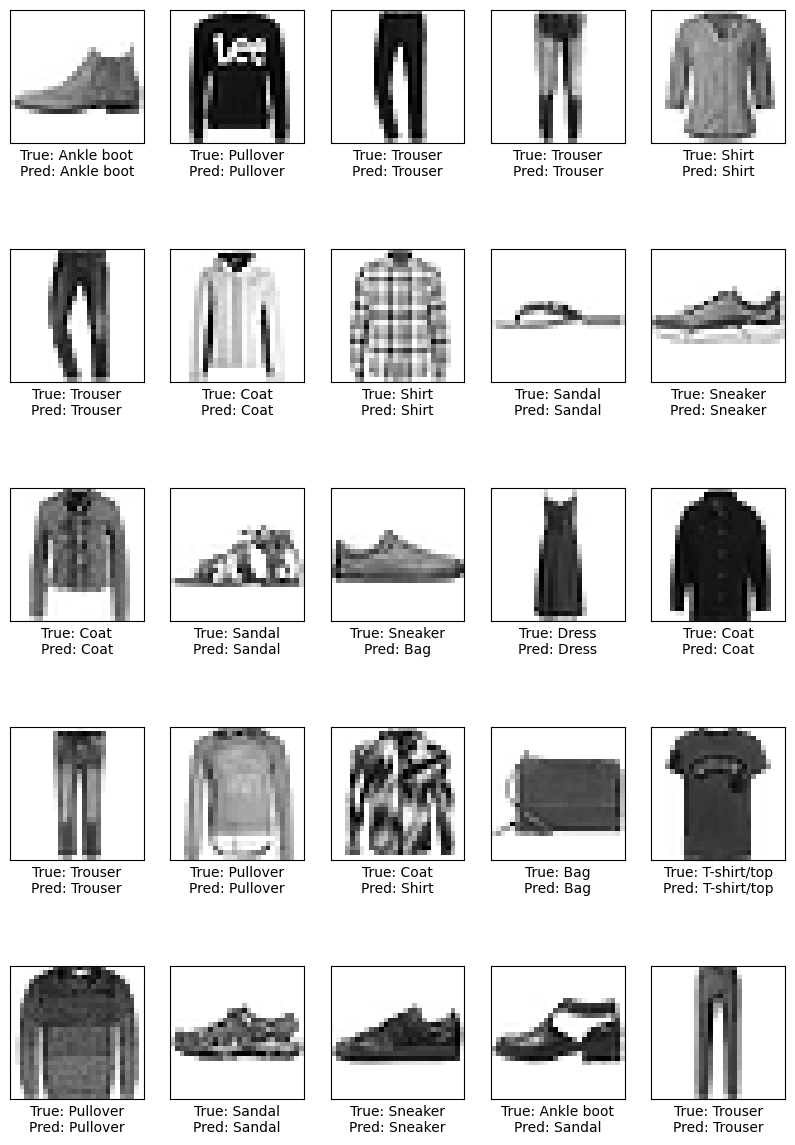

In [13]:
# Display some test images with predictions
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred_classes[i]]}")
plt.show()

In [14]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.87      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.88      0.82      0.85      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.86      0.85      0.86      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.72      0.78      0.75      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

